In [ ]:
from datasets import load_dataset
from latex_to_image import save_latex_as_image
from modify_latex import modify_numeric_values  
from IPython.display import Image, display
import os, datetime

dataset = load_dataset("staghado/ArXiv-tables")["train"]
os.makedirs("outputs", exist_ok=True)

for i in range(5):
    latex = dataset[i]["latex_content"]
    if "\\begin{tabular}" not in latex:
        continue

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    name_base = f"outputs/sample_{i}_{timestamp}"

    # 原始图像
    save_latex_as_image(latex, outname=f"{name_base}_original")
    display(Image(f"{name_base}_original.png"))

    # 是否修改
    if input("修改？(Y/N): ").strip().upper() != "Y":
        continue

    old_val = input("原始值: ").strip()
    new_val = input("新值: ").strip()
    modified = modify_numeric_values(latex, old_val, new_val)
    save_latex_as_image(modified, outname=f"{name_base}_modified")
    display(Image(f"{name_base}_modified.png"))

In [ ]:
from datasets import load_dataset
from latex_to_image import save_latex_as_image
from modify_latex import modify_numeric_values
from IPython.display import Image, display
import os, datetime

dataset = load_dataset("staghado/ArXiv-tables")["train"]
os.makedirs("outputs", exist_ok=True)

for i in range(len(dataset)):
    latex = dataset[i]["latex_content"]
    if "\\begin{tabular}" not in latex:
        continue  # 跳过非表格

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    name_base = f"outputs/sample_{i}_{timestamp}"

    try:
        # 尝试渲染原始图像
        save_latex_as_image(latex, outname=f"{name_base}_original")
        display(Image(f"{name_base}_original.png"))
    except Exception as e:
        print(f"第 {i} 个表格渲染失败，跳过。原因：{e}")
        continue

    # 询问是否修改
    if input(f"第 {i} 个表格渲染成功，是否修改？(Y/N): ").strip().upper() != "Y":
        continue

    old_val = input("请输入原始值: ").strip()
    new_val = input("请输入新值: ").strip()

    try:
        modified = modify_numeric_values(latex, old_val, new_val)
        save_latex_as_image(modified, outname=f"{name_base}_modified")
        display(Image(f"{name_base}_modified.png"))
    except Exception as e:
        print(f"⚠️ 修改后渲染失败，跳过。原因：{e}")

['id', 'arxiv_id', 'page', 'bounding_box', 'latex_content', 'extracted_content', 'similarity_score', 'table_image', 'page_image']
图像保存成功：outputs/sample_0_20250521_002402_original.png


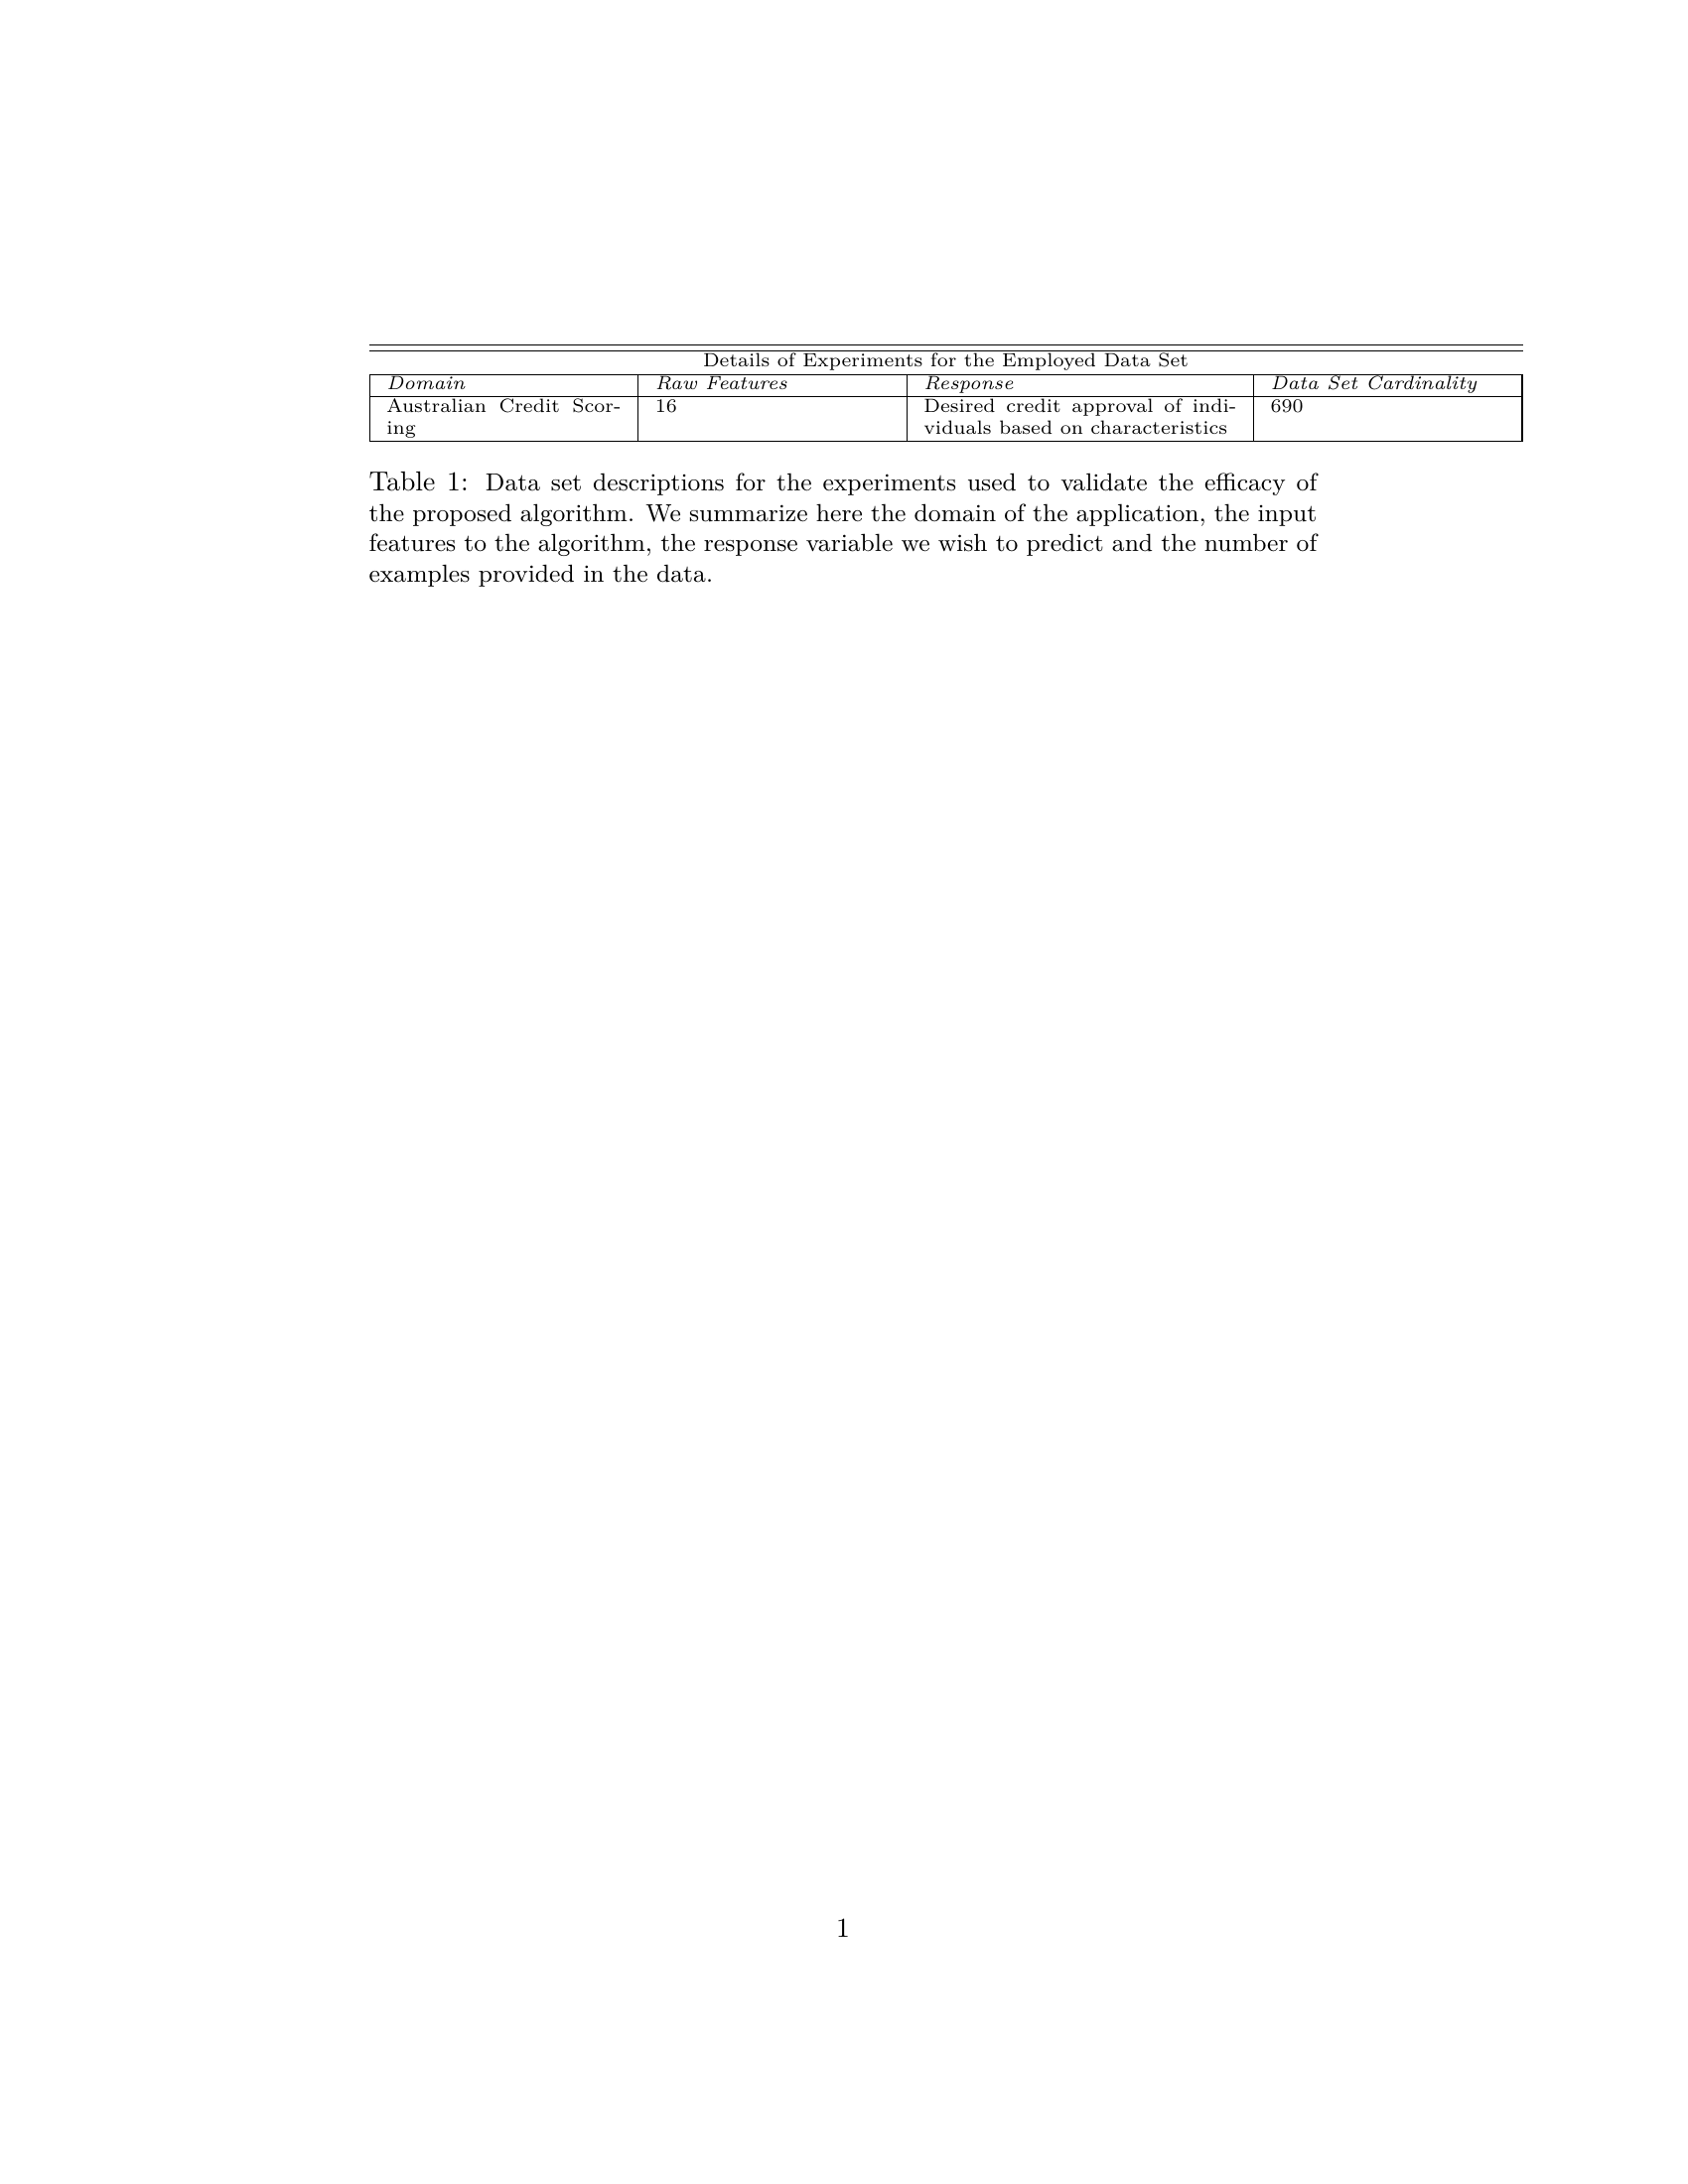

图像保存成功：outputs/sample_0_20250521_002402_modified.png


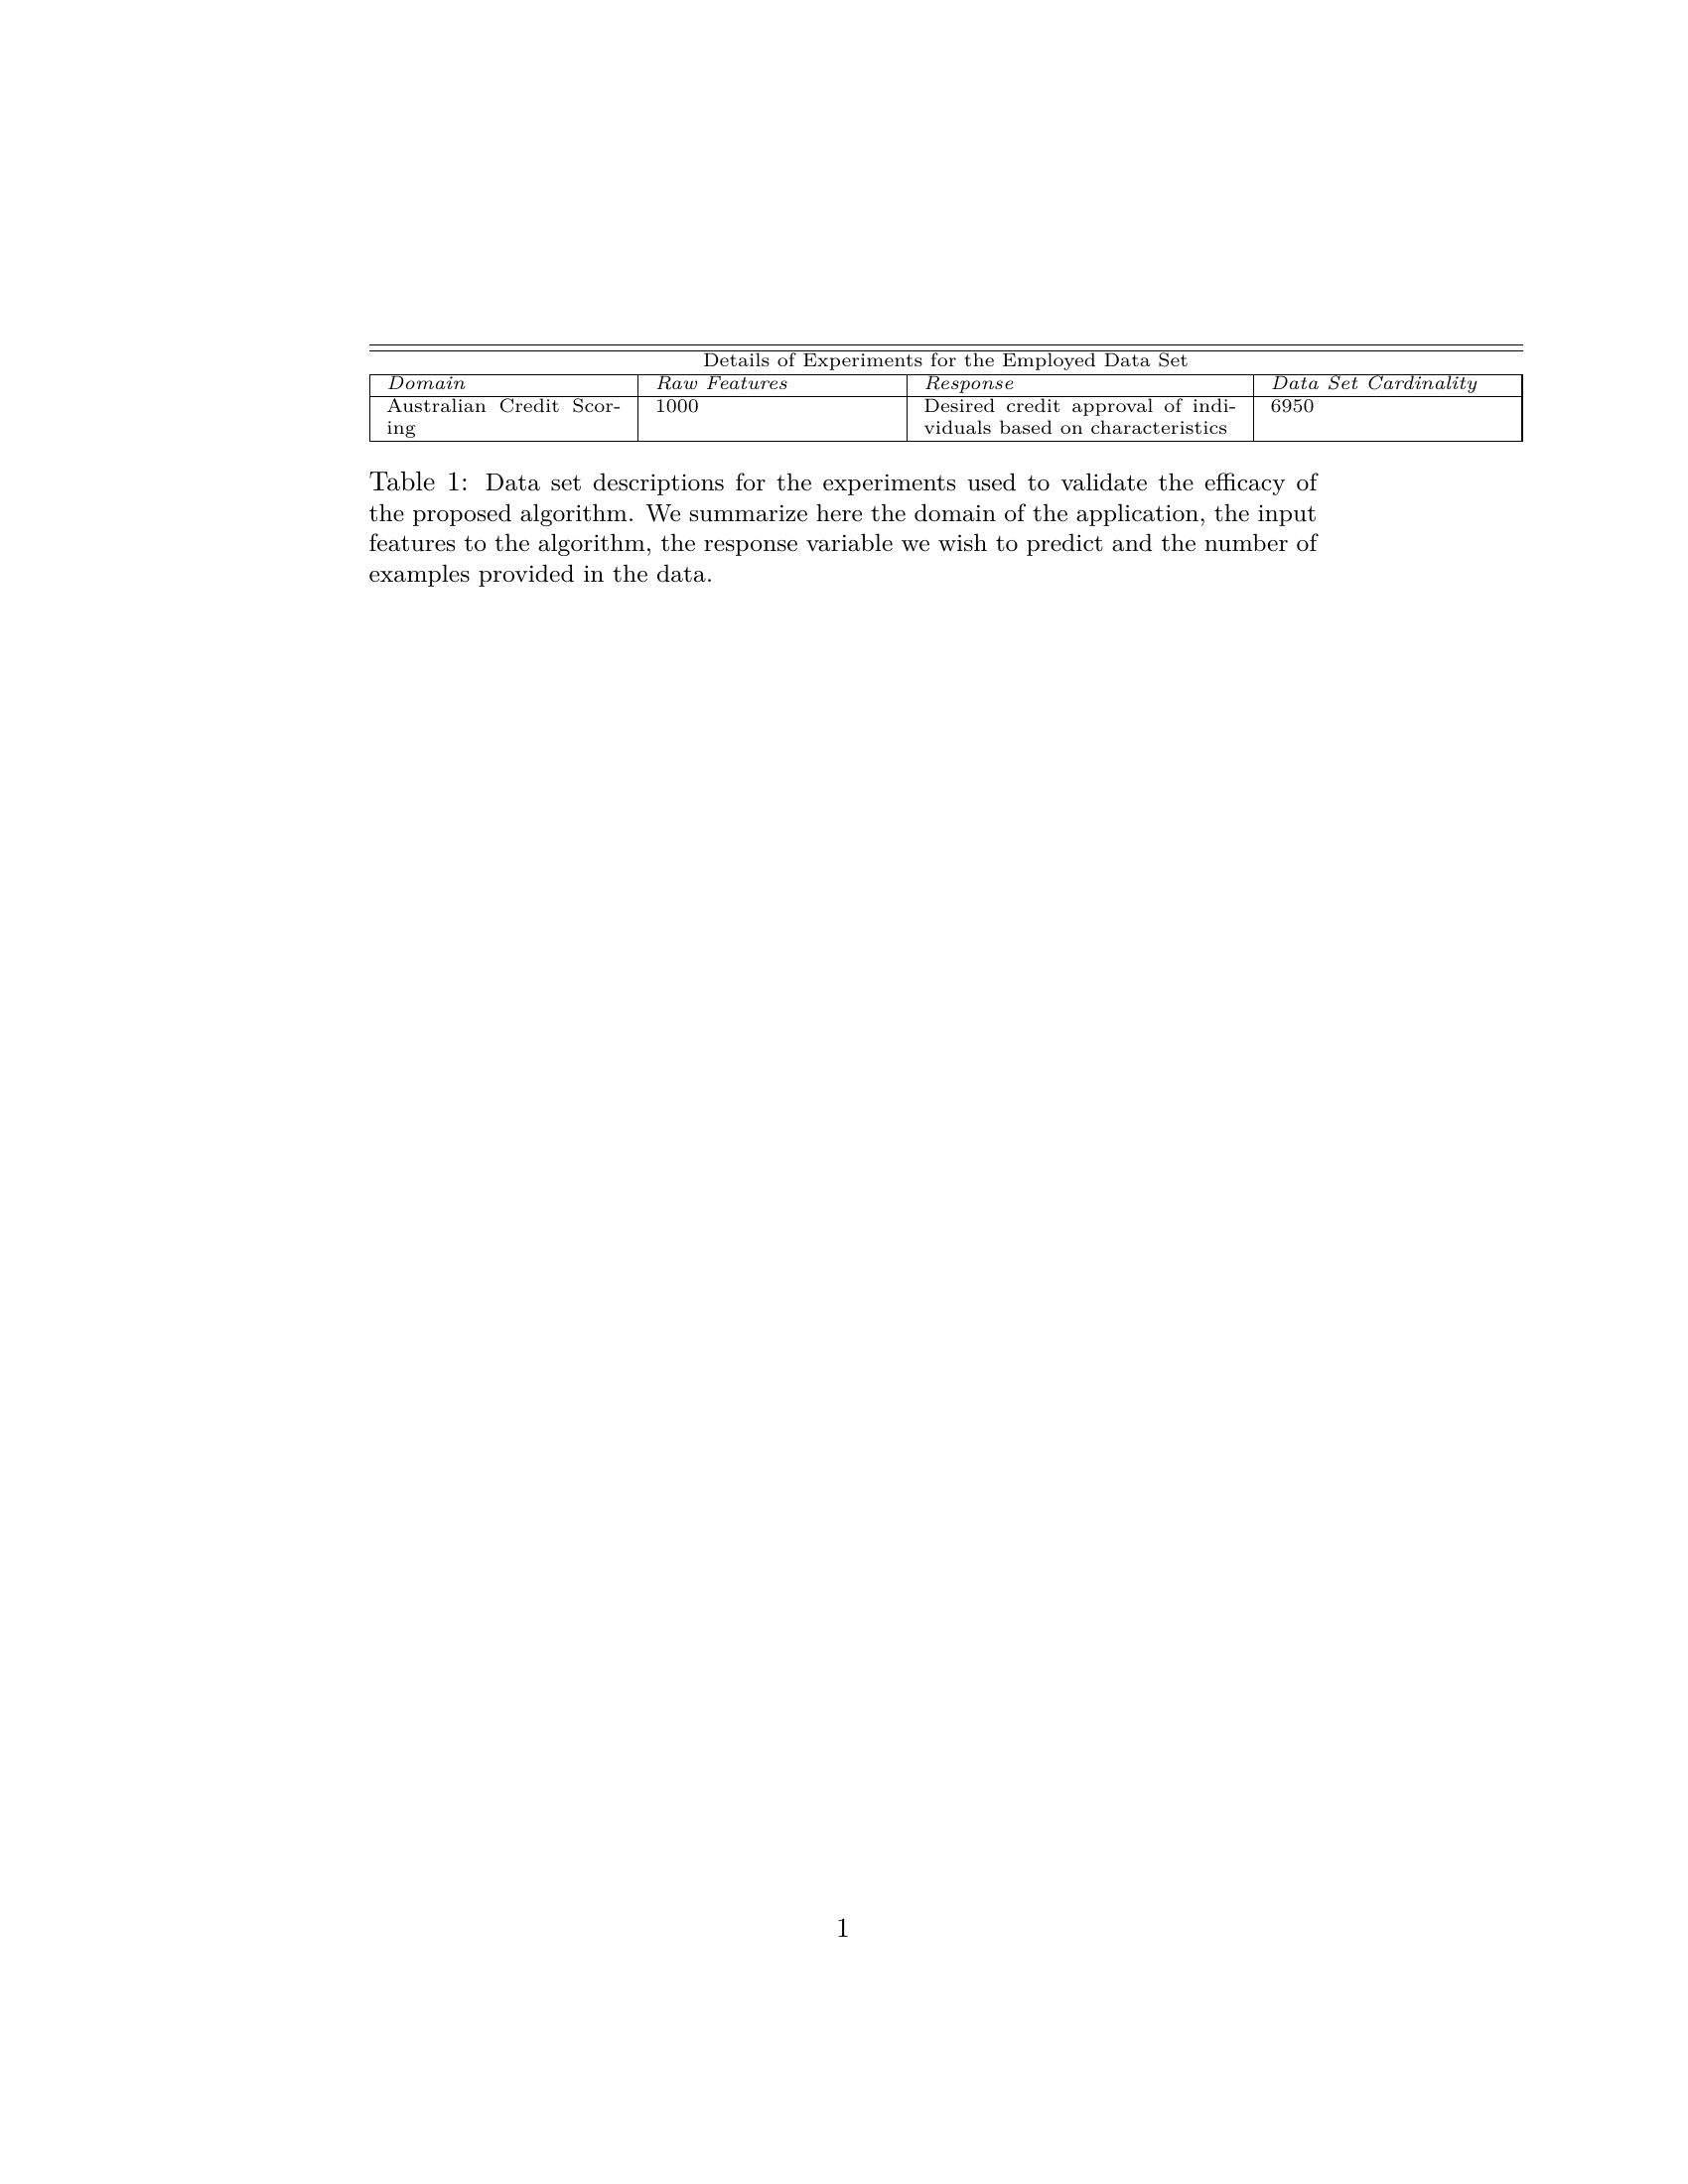

✅ 修改完成，图像已保存。

图像保存成功：outputs/sample_1_20250521_002426_original.png


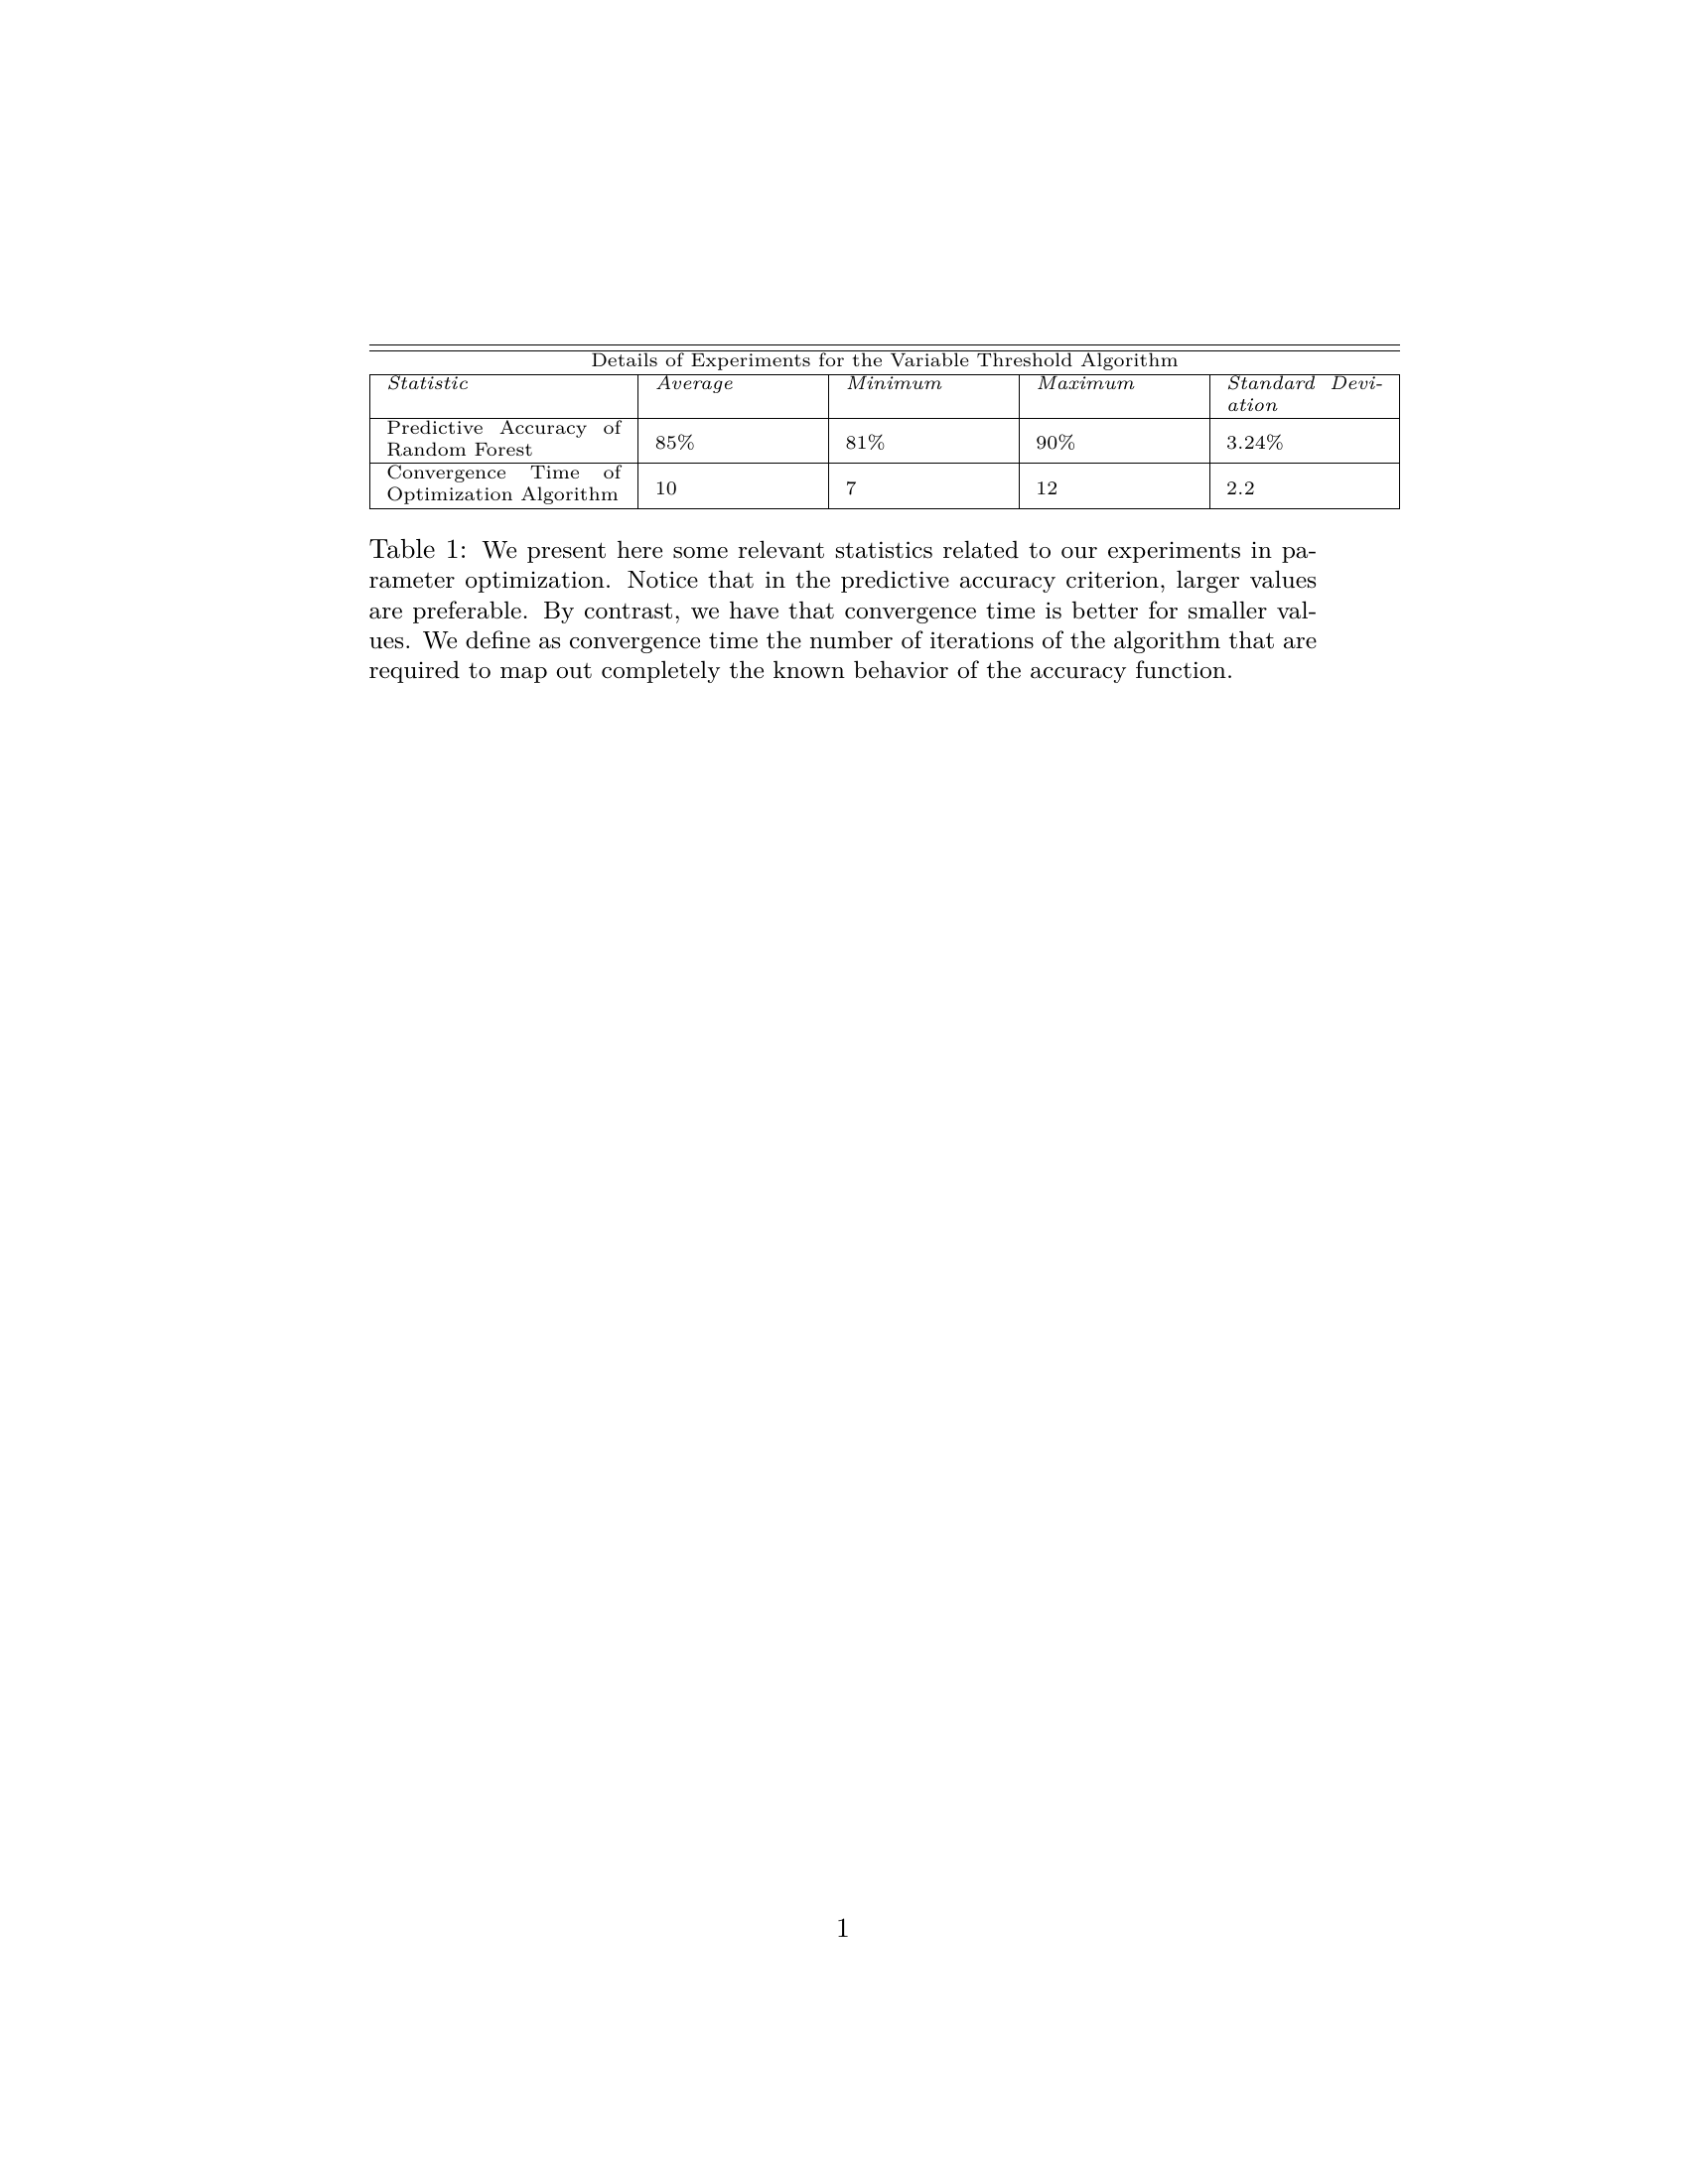

In [ ]:
from datasets import load_dataset
from latex_to_image import save_latex_as_image
from modify_latex import modify_numeric_values
from IPython.display import Image, display
import os, datetime

# 加载数据集
dataset = load_dataset("staghado/ArXiv-tables")["train"]
os.makedirs("outputs", exist_ok=True)

for i in range(len(dataset)):
    latex = dataset[i]["latex_content"]
    if "\\begin{tabular}" not in latex:
        continue

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    name_base = f"outputs/sample_{i}_{timestamp}"

    try:
        # 👀 渲染并展示原始图像
        save_latex_as_image(latex, outname=f"{name_base}_original")
        display(Image(filename=f"{name_base}_original.png"))
    except Exception as e:
        print(f"❌ 第 {i} 个表格渲染失败，跳过。原因：{e}")
        continue

    # ❓用户看完图像后决定是否修改
    should_modify = input(f"📝 是否修改第 {i} 个表格？(Y/N): ").strip().upper()
    if should_modify != "Y":
        continue

    # 🔢 输入要修改多少个值
    try:
        n_changes = int(input("🔢 想修改几个值？: ").strip())
    except ValueError:
        print("⚠️ 输入无效，跳过该表格。")
        continue

    modified_latex = latex
    for j in range(n_changes):
        old_val = input(f"第 {j+1} 个原始值: ").strip()
        new_val = input(f"第 {j+1} 个新值: ").strip()
        modified_latex = modify_numeric_values(modified_latex, old_val, new_val)

    try:
        # 📷 渲染并展示修改后的图像
        save_latex_as_image(modified_latex, outname=f"{name_base}_modified")
        display(Image(filename=f"{name_base}_modified.png"))
        print("✅ 修改完成，图像已保存。\n")
    except Exception as e:
        print(f"⚠️ 修改后渲染失败：{e}")